<a href="https://colab.research.google.com/github/notegogo55/Stat02/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

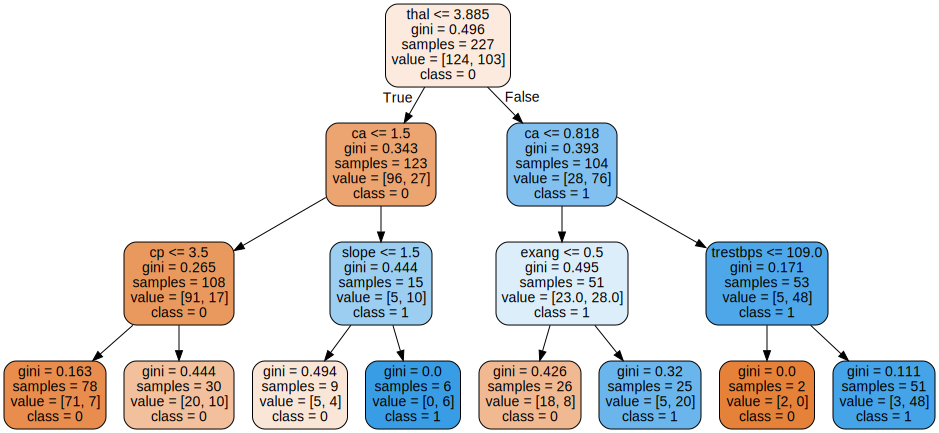

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
#Decision Tree
pipe_dt = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'model__max_depth': [2, 3, 4, 5, None],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print("=== Decision Tree ===")
print("Best Params:", grid_dt.best_params_)
print("Accuracy:", acc_dt)
print("F1 Macro:", f1_dt)


#Bagging Classifier
pipe_bag = Pipeline([
    ('model', BaggingClassifier(random_state=42))
])

param_grid_bag = {
    'model__n_estimators': [10, 50, 100],
    'model__max_samples': [0.5, 0.7, 1.0],
    'model__max_features': [0.5, 0.7, 1.0]
}

grid_bag = GridSearchCV(pipe_bag, param_grid_bag, cv=5, scoring='f1_macro', n_jobs=-1)
grid_bag.fit(X_train, y_train)

best_bag = grid_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='macro')

print("\n=== Bagging Classifier ===")
print("Best Params:", grid_bag.best_params_)
print("Accuracy:", acc_bag)
print("F1 Macro:", f1_bag)


#Random Forest
pipe_rf = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [2, 4, 6, None],
    'model__max_features': ['sqrt', 'log2', None]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("\n=== Random Forest ===")
print("Best Params:", grid_rf.best_params_)
print("Accuracy:", acc_rf)
print("F1 Macro:", f1_rf)



=== Decision Tree ===
Best Params: {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_split': 2}
Accuracy: 0.8157894736842105
F1 Macro: 0.8093189964157705

=== Bagging Classifier ===
Best Params: {'model__max_features': 1.0, 'model__max_samples': 0.7, 'model__n_estimators': 10}
Accuracy: 0.8289473684210527
F1 Macro: 0.8265144863915715

=== Random Forest ===
Best Params: {'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 200}
Accuracy: 0.881578947368421
F1 Macro: 0.8798946444249341


In [ ]:
print("\n=== Hyperparameter Summary ===")
print("Decision Tree:", grid_dt.best_params_)
print("Bagging:", grid_bag.best_params_)
print("Random Forest:", grid_rf.best_params_)

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Bagging', 'Random Forest'],
    'Accuracy': [acc_dt, acc_bag, acc_rf],
    'F1 Macro': [f1_dt, f1_bag, f1_rf]
})
print("\n=== Model Comparison ===")
print(results)

best_model_name = results.iloc[results['F1 Macro'].idxmax()]['Model']
print(f"\nBest Model: {best_model_name}")


=== Hyperparameter Summary ===
Decision Tree: {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_split': 2}
Bagging: {'model__max_features': 1.0, 'model__max_samples': 0.7, 'model__n_estimators': 10}
Random Forest: {'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 200}

=== Model Comparison ===
           Model  Accuracy  F1 Macro
0  Decision Tree  0.815789  0.809319
1        Bagging  0.828947  0.826514
2  Random Forest  0.881579  0.879895

Best Model: Random Forest
